# Viterbi Gilbert-Elliot demo
These are not actual experiments, but anyway demonstrate how the routines are used.

tf.Tensor(7.105427357601002e-14, shape=(), dtype=float64)
tf.Tensor(0, shape=(), dtype=int32)
(3, 100)


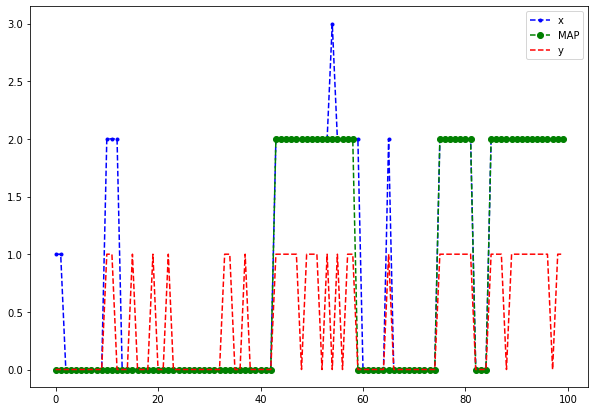

In [1]:
import numpy as np
import tensorflow as tf
import parallel_control.ge_model_np as ge_model_np
import parallel_control.viterbi_np as viterbi_np
import parallel_control.viterbi_tf as viterbi_tf
import matplotlib.pyplot as plt

ge = ge_model_np.GEModel(seed=1)

x_list, y_list = ge.genData(100)

# NumPy solution
viterbi = viterbi_np.Viterbi_np(ge.prior, ge.Pi, ge.Po)
v_map1, V_list1 = viterbi.seqViterbi(y_list)

# using a TensorFlow version
fs, Ls, LT = viterbi_tf.make_viterbi_fsc(ge, y_list)
v_map2, Vs_vit2 = viterbi_tf.viterbi_fsc_par_bwfw(fs, Ls, LT)

err = tf.math.reduce_max(tf.math.abs(tf.convert_to_tensor(V_list1, dtype=Vs_vit2.dtype) - Vs_vit2))
print(err)

err = tf.math.reduce_max(tf.math.abs(tf.convert_to_tensor(v_map1, dtype=v_map2.dtype) - v_map2))
print(err)

ge_res = np.stack([x_list, y_list, v_map1[1:]])
print(ge_res.shape)

t_list = np.arange(stop=x_list.shape[0])

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(t_list, x_list, label="x", color="b", linestyle="--", marker=".")
ax.plot(t_list, v_map1[1:], label="MAP", color="g", linestyle="--", marker="o")
ax.plot(t_list, y_list, label="y", color="r", linestyle="--")
_ = plt.legend()


np.savetxt('ge_res.txt',ge_res.T)